# Visualization of distributions

## AIM: 
The aim of this notebook is to visualize the distribution of gene variant transcriptions and how they vary across classes. 

Visualizations across the replications will be analysed to see if the transcription process introduced error overall.

## LOAD PACKAGES

In [10]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

## Data Importation

The data, contains information about gene variant transcriptions. There were three replications of the variant transcriptions and a final column where the three replications were averaged. The two categorial variables included are the SUMOver (which is classes of genes - S#V# format).

Try to visualize the distributions according to each group. 

In [60]:
df = pd.read_csv('data.csv')
df.head()

,SUMOvar,Replicate 1,Replicate 2,Replicate 3,Average Cq
0,S1V1,16.27132,16.19231,16.36603,16.276553
1,S1V1,20.14263,20.12184,20.05466,20.106377
2,S1V1,23.07819,23.10269,22.86079,23.013890
3,S1V1,25.53921,25.51511,25.41548,25.489933
4,S1V1,26.05758,25.99988,26.04024,26.032567


## Initial Visualization

In order to get a fair idea of how each gene class is distributed, a bar plot of the cummulative "average replications" vs "gene  class" is plotted

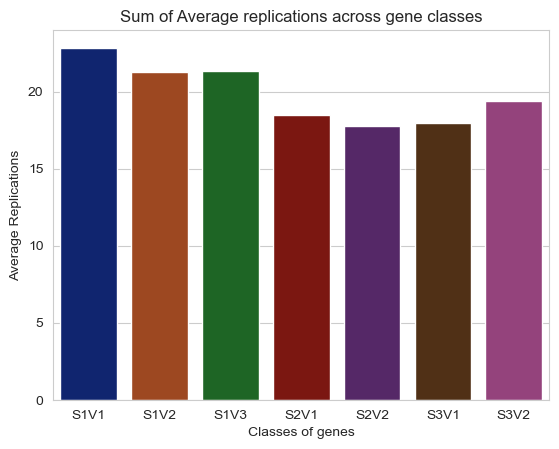

In [61]:
ax = sns.barplot(x='SUMOvar', y='Average Cq',data=df, palette='dark',  errorbar=None)

#specfiy axis labels
ax.set(xlabel='Classes of genes',
       ylabel='Average Replications',
       title='Sum of Average replications across gene classes')

#display barplot
plt.show()

From the cluster/bar plot, it is evident that gene class $S_1V_1$ recorded the highest mean occurrences. With $S_2V_2$ recording the minimum.

In order a make this visualisation easily to grasp how each gene class is fairing, an order barplot is given below

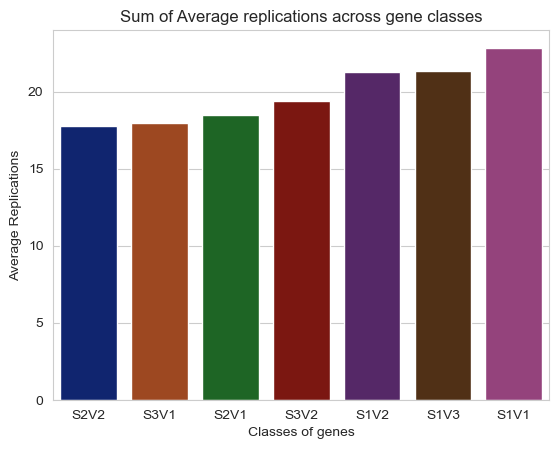

In [62]:
order = df.groupby(["SUMOvar"])["Average Cq"].sum().sort_values().index
ax = sns.barplot(x='SUMOvar', y='Average Cq',data=df, palette='dark',  errorbar=None, order=order)

#specfiy axis labels
ax.set(xlabel='Classes of genes',
       ylabel='Average Replications',
       title='Sum of Average replications across gene classes')

#display barplot
plt.show()

## Distribution of gene variant transcription

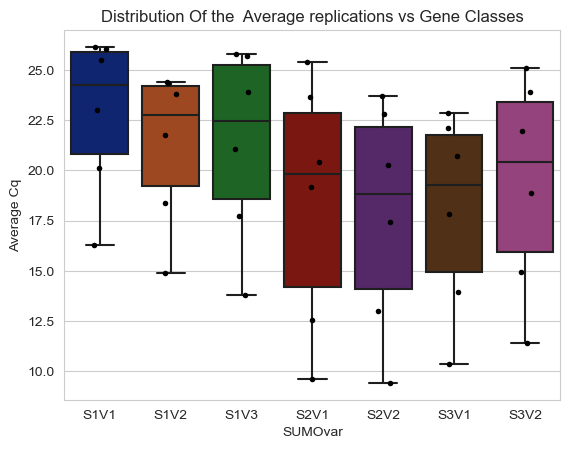

In [63]:
sns.boxplot(x='SUMOvar', y='Average Cq', data=data, palette='dark')
sns.stripplot(x='SUMOvar', y='Average Cq', data=data, size=4, jitter=True, color='black')
plt.title('Distribution Of the  Average replications vs Gene Classes')
#plt.legend(title='SUMOvar', loc='center right')
sns.set_style('whitegrid')
plt.show()

Next, we visualized the gene transcriptions across the classes. Evidence of outliers in each of the classes can be observed from the figure above. In can be inferrted from the box plot that, each of the gene classes are left skewed, with $S_2V_1$ having a higher dispersion. Similarly, $S_1V_1$ has has the least dispersion. 

The range of values for the gene classes $S_2V_1, S_2V_2$ is widely spread out. With $S_1V_1, S_1V_2$ closely parked together.

## Replication Plots

In order to visualizations across the replications, first the data was transformed, where all the replications were put into the same column. 

In [68]:
New_DAT = pd.melt(df.iloc[:, :-1], id_vars="SUMOvar", var_name="Groups", value_name="Replications")

New_DAT.columns = ["SUMOvar", "Groups", "Replications"]

print(New_DAT.head())

  SUMOvar       Groups  Replications
0    S1V1  Replicate 1      16.27132
1    S1V1  Replicate 1      20.14263
2    S1V1  Replicate 1      23.07819
3    S1V1  Replicate 1      25.53921
4    S1V1  Replicate 1      26.05758


In [65]:
New_DAT

,SUMOvar,Groups,Replications
0,S1V1,Replicate 1,16.271320
1,S1V1,Replicate 1,20.142630
2,S1V1,Replicate 1,23.078190
3,S1V1,Replicate 1,25.539210
4,S1V1,Replicate 1,26.057580
...,...,...,...
121,S3V2,Replicate 3,14.024527
122,S3V2,Replicate 3,17.797498
123,S3V2,Replicate 3,21.140170
124,S3V2,Replicate 3,23.225069


In [75]:
df2 =New_DAT.groupby(['Groups']).sum()
print(df2)

                                                       SUMOvar  Replications
Groups                                                                      
Replicate 1  S1V1S1V1S1V1S1V1S1V1S1V1S1V2S1V2S1V2S1V2S1V2S1...    859.679758
Replicate 2  S1V1S1V1S1V1S1V1S1V1S1V1S1V2S1V2S1V2S1V2S1V2S1...    822.617256
Replicate 3  S1V1S1V1S1V1S1V1S1V1S1V1S1V2S1V2S1V2S1V2S1V2S1...    820.412404


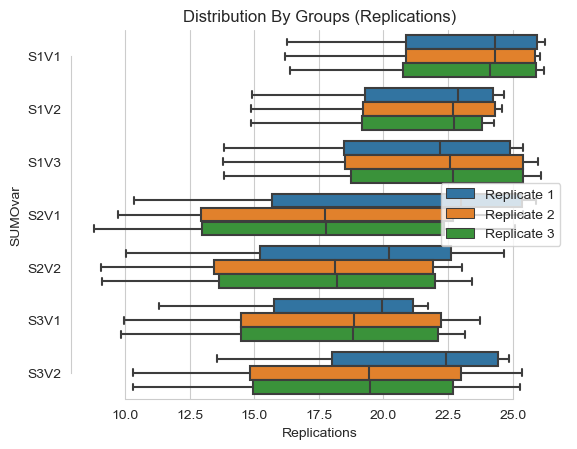

In [67]:
# Plot the data
sns.boxplot(x='Replications', y='SUMOvar', hue='Groups', data=New_DAT)
plt.title('Distribution By Groups (Replications)')
plt.legend(loc='right')
sns.despine(trim=True)
plt.show()

After the preprocessing, a joint boxplot of the three replications was visualized.  It can be observed that $S_2V_1$ has the highest dispersions across all the groups and $S_1V_1$ has the least dispersion, which confirms our earlier observations.